# Clasificador Bayesiano de Idiomas

Parara reponer las 4 horas de la semana pasada, y como ejercicio de las cosas que ya vimos en clase, quiero que hagan un clasificador de idioma de 3 o 4 lenguas distintas. La característica que utilizará el clasificador, será n-gramas (caracteres) y ustedes deben determinar una n óptima basados en las métricas de evaluación dadas anteriormente. El clasificador, hagan un clasificador tipo Bayesiano (programenlo ustedes, por favor). Utilicen el truco de los exponentes que vimos la penúltima vez.

Teorema de Bayes

$$ p(C\mid D) = p(C \vert F_1,\dots,F_n) = \frac{p(C) \ p(F_1,\dots,F_n\vert C)}{p(F_1,\dots,F_n)} $$

Probabilidad de que el documento sea de determinada clase.

In [1]:
import nltk
import numpy as np 
from collections import Counter
import matplotlib.pyplot as plt

In [5]:
clases = {
    0 : 'es',
    1 : 'pt',
    2 : 'en',
}
colors = [
    'r',
    'g',
    'b'
]
corpus = {
    index : open(f'corpus/{lang}.txt', 'r', encoding='utf-8').read() 
    for index, lang in clases.items()
}

In [6]:
bigramas = {
    index : [ch1 + ch2 for ch1, ch2 in zip(corpus_lang[:-1], corpus_lang[1:])]
    for index, corpus_lang in corpus.items()
}

In [7]:
for index, bigramas_lang in bigramas.items():
    print(clases[index])
    print(len(bigramas_lang))
    print(bigramas_lang[5:15])

es
21499
['ma', 'ar', 'rá', 'á ', ' c', 'co', 'om', 'mo', 'o ', ' p']
pt
21859
['to', 'om', 'ma', 'ad', 'do', 'o ', ' c', 'co', 'om', 'mo']
en
21814
['ll', 'l ', ' b', 'be', 'e ', ' t', 'ta', 'ak', 'ke', 'en']


In [8]:
freq_bigamas = {
    index : Counter(bigramas_leng) 
    for index, bigramas_leng in bigramas.items()
}

In [9]:
for index, counters in freq_bigamas.items():
    print(clases[index])
    print(len(counters))
    print(counters.most_common(10))

es
857
[('e ', 592), ('a ', 583), ('s ', 497), ('de', 448), (' d', 424), (' e', 403), ('o ', 388), ('en', 366), ('n ', 363), ('es', 321)]
pt
875
[('o ', 661), ('s ', 647), ('e ', 568), ('a ', 540), (' d', 442), (' e', 349), ('os', 341), ('de', 318), (' a', 303), ('do', 301)]
en
878
[('e ', 671), (' t', 512), ('th', 457), (' a', 423), ('he', 413), ('s ', 402), ('in', 341), ('d ', 339), ('er', 313), ('n ', 303)]


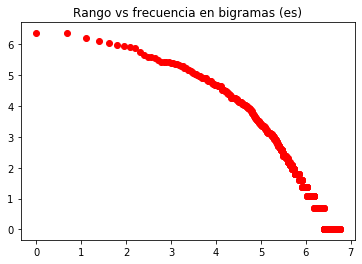

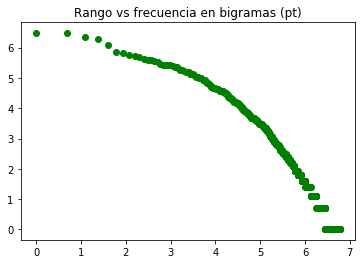

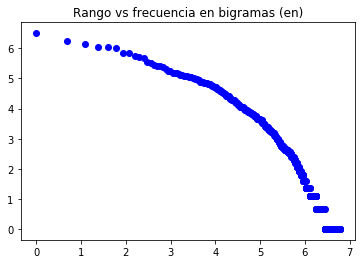

In [10]:
for index, counters in freq_bigamas.items():
    plt.figure()
    plt.title(f'Rango vs frecuencia en bigramas ({clases[index]})')
    freq = [fr[1] for fr in counters.most_common()]
    ranks = range(1, len(freq)+1)
    plt.scatter(np.log(ranks), np.log(freq), color=colors[index])
    plt.show()

In [11]:
total = sum(freq_bigamas.values(), Counter())
len(total.most_common())

1351

In [12]:
for item in total.most_common():
    lambda item: item(1)==1, total.most_common())
hapax

SyntaxError: invalid syntax (<ipython-input-12-04334b282be2>, line 2)

In [64]:
from itertools import count
from collections import defaultdict
from functools import partial

def hashing_v1(seq):
    mapping = defaultdict(partial(next, count()))
    return [mapping[tuple(el)] for el in seq]

def hashing_v2(seq):
    mapping = defaultdict(partial(next, count()))
    result = []
    for le in seq:
        le.flags.writeable = False
        result.append(mapping[le.data])
    return result